In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2, SimpleSetting
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent, DynamicFroomleAgent, UCBAgent
from BanditRec.simulator import Simulator
from BanditRec.results import calcualte_ctr
from BanditRec.tuning import run_grid, show_grid

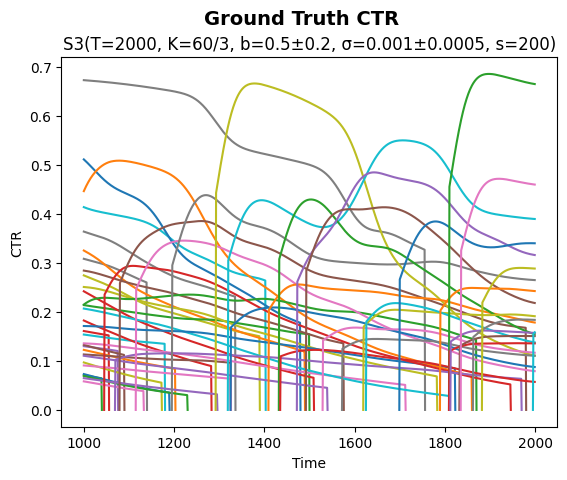

In [3]:
setting_elws = NewsSimulationSetting2(
    SettingConfig(
        episode_count=2000, 
        item_count=60, 
        k=3, 
        episode_length=1
    ),
    lifetime=900,
    ctr_base=0.5,
    ctr_fuzz=0.2,
    sigma_base=0.001,
    sigma_fuzz=0.0005,
    smoothing=200
)
setting_elws.visualize(tmin=1000)

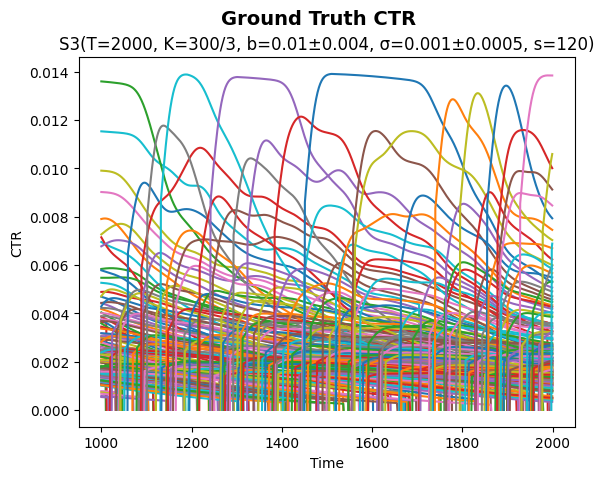

In [4]:
setting_elws2 = NewsSimulationSetting2(
    SettingConfig(
        episode_count=2000, 
        item_count=300, 
        k=3, 
        episode_length=1
    ),
    lifetime=900,
    ctr_base=0.01,
    ctr_fuzz=0.004,
    sigma_base=0.001,
    sigma_fuzz=0.0005,
    smoothing=120
)
setting_elws2.visualize(tmin=1000)

## Froomle Grids 

In [100]:
setting_elws.ctr_base = 0.5
setting_elws.ctr_fuzz = 0.2
run_grid(setting_elws, FroomleAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'boost_denominator': [1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    'boost_rank': [None, 1, 2, 3],
    'episode_length': [5, 10, 25, 50],
}, 'fr/setting1')

  0%|          | 0/1120 [00:00<?, ?it/s]

In [101]:
setting_elws.ctr_base = 0.05
setting_elws.ctr_fuzz = 0.02
run_grid(setting_elws, FroomleAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'boost_denominator': [1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    'boost_rank': [None, 1, 2, 3],
    'episode_length': [5, 10, 25, 50],
}, 'fr/setting1m')

  0%|          | 0/1120 [00:00<?, ?it/s]

In [102]:
setting_elws2.ctr_base = 0.5
setting_elws2.ctr_fuzz = 0.2
run_grid(setting_elws2, FroomleAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'boost_denominator': [1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    'boost_rank': [None, 1, 2, 3],
    'episode_length': [5, 10, 25, 50],
}, 'fr/setting2')

  0%|          | 0/1120 [00:00<?, ?it/s]

In [20]:
setting_elws2.ctr_base = 0.01
setting_elws2.ctr_fuzz = 0.004
run_grid(setting_elws2, FroomleAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'boost_denominator': [1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    'boost_rank': [None, 1, 2, 3],
    'episode_length': [5, 35, 100],
}, 'fr/setting2m')

  0%|          | 0/840 [00:00<?, ?it/s]

Process ForkPoolWorker-9819:
Process ForkPoolWorker-9817:
Process ForkPoolWorker-9823:
Process ForkPoolWorker-9820:
Process ForkPoolWorker-9824:
Process ForkPoolWorker-9821:
Process ForkPoolWorker-9822:
Process ForkPoolWorker-9818:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/noah/Documents/School/Ma1 Informatica/Onderzoeksproject/bandit-rec/env/lib/python3.11/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/noah/Documents/School/Ma1 Informatica/Onderzoeksproject/bandit-rec/env/lib/python3.11/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/noah/Documents/School/Ma1 Informatica/Onderzoeksproject/bandit-rec/env/lib/python3.11/site-packages/multiprocess/

KeyboardInterrupt: 

In [8]:
show_grid('fr/setting2m', (1, 2), [(3, 1)])

## Dynamic Froomle Grids

In [19]:
setting_elws2.ctr_base = 0.01
setting_elws2.ctr_fuzz = 0.004
run_grid(setting_elws2, DynamicFroomleAgent, {
    'boost_base': [10, 35, 100, 350, 1000, 3500, 10_000],
    'boost_modifier': [1.1, 1.2, 1.3],
    'episode_length': [10, 35, 100],
}, 'frd/setting2m')

  0%|          | 0/63 [00:00<?, ?it/s]

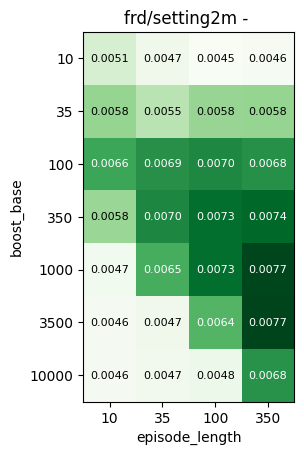

In [11]:
show_grid('frd/setting2m', (2, 0))

# Thompson Grids

In [6]:
setting_elws.ctr_base = 0.5
setting_elws.ctr_fuzz = 0.2
run_grid(setting_elws, ThompsonAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'episode_length': [10],
}, 'ts/setting1')

  0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
setting_elws.ctr_base = 0.01
setting_elws.ctr_fuzz = 0.004
run_grid(setting_elws, ThompsonAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'episode_length': [500],
}, 'ts/setting1m')

  0%|          | 0/7 [00:00<?, ?it/s]

In [356]:
setting_elws2.ctr_base = 0.5
setting_elws2.ctr_fuzz = 0.2
run_grid(setting_elws2, ThompsonAgent, {
    'ws': [500, 1000, 2500, 5000, 10000, 25000, None],
    'episode_length': [10],
}, 'ts/setting2')

  0%|          | 0/7 [00:00<?, ?it/s]

In [18]:
setting_elws2.ctr_base = 0.01
setting_elws2.ctr_fuzz = 0.004
run_grid(setting_elws2, ThompsonAgent, {
    'ws': [10000, 25000, 100000, None],
    'episode_length': [10, 35, 100],
}, 'ts/setting2m')

  0%|          | 0/12 [00:00<?, ?it/s]

## Comparison

In [5]:
sim = Simulator(run_count=25, seed_change_interval=1)
setting_elws2.ctr_base = 0.01
setting_elws2.ctr_fuzz = 0.004
sim.set_setting(setting_elws2)
sim.set_episode_length(350)
sim.run_oracle()
# sim.run_agent(FroomleAgent, {'boost_denominator': 10_000, 'boost_ctr': 2, 'ws': None})
sim.run_agent(ThompsonAgent, {'window_size': None})
sim.run_agent(DynamicFroomleAgent, {'boost_base_modifier': 10, 'boost_modifier': 1.0})
sim.run_agent(DynamicFroomleAgent, {'boost_base_modifier': 10, 'boost_modifier': 1.0, 'window_size_modifier': 50})
sim.run_agent(DynamicFroomleAgent, {'boost_base_modifier': 10, 'boost_modifier': 1.0, 'learning_rate': 0.001})
None

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

 S3(T=2000x350, K=300/3, b=0.01±0.004, σ=0.001±0.0005, s=120) 
     0.850 ±0.046      - ISW-DYN-FR(base=x10, ctr=x1.0, ws=x50)
     0.837 ±0.045      - W-DYN-FR(base=x10, ctr=x1.0, lr=0.001)
     0.767 ±0.035      - TS()
     0.661 ±0.057      - DYN-FR(base=x10, ctr=x1.0)



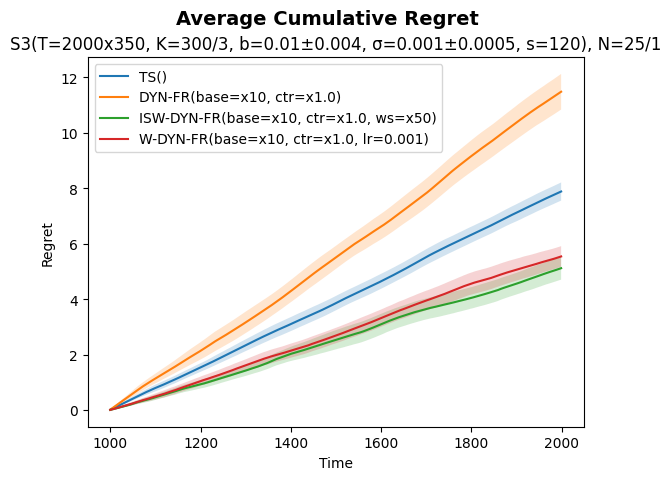

In [7]:
sim.results.ctrs(tmin=1000, relative=True, confidence=None)
sim.results.create_regret_plot(tmin=1000)

## Checking out the impression graphs

In [10]:
sim = Simulator(run_count=100, seed_change_interval=0)
for el in [5, 10, 25, 50, 100]:
    setting_elws.episode_length = el
    sim.set_setting(setting_elws)
    sim.run_oracle()
    ws_fr, d = params_FR[el]
    ws_ts = params_TS[el]
    sim.run_agent(FroomleAgent, {'boost_denominator': d, 'boost_rank': 2, 'ws': ws_fr}, label='SW-FR')
    sim.run_agent(ThompsonAgent, {'ws': ws_ts}, label='SW-TS')
    
sim_elws_single = sim

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

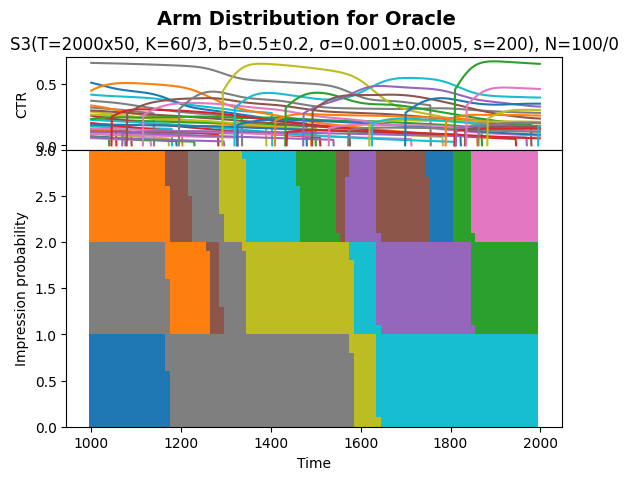

In [11]:
sim_elws_single.results.create_impressions_plot(
    agent='Oracle', 
    setting='S3(T=2000x50, K=60/3, b=0.5±0.2, σ=0.001±0.0005, s=200)',
    tmin=1000
)

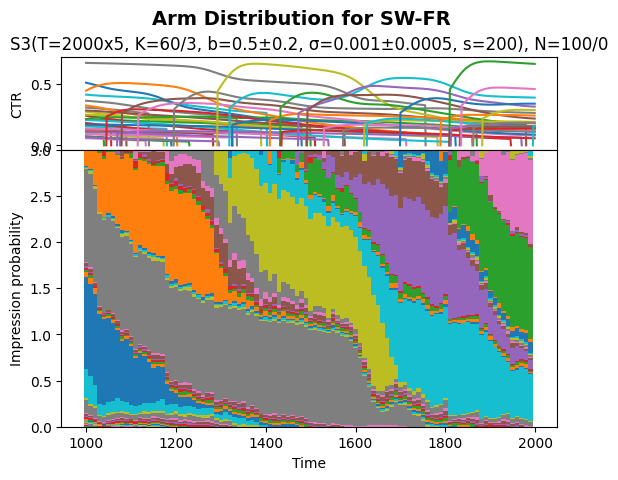

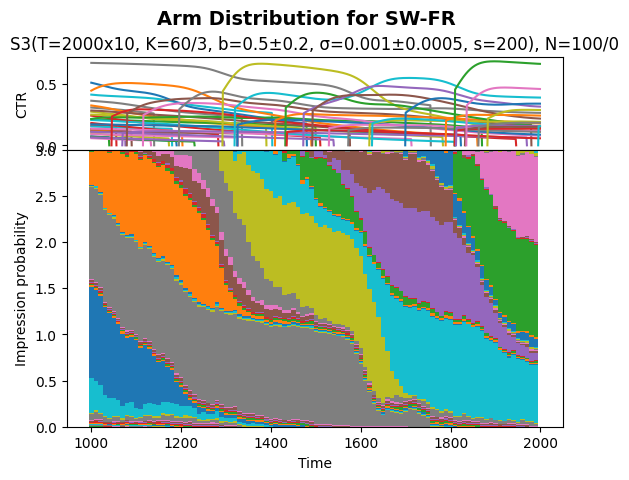

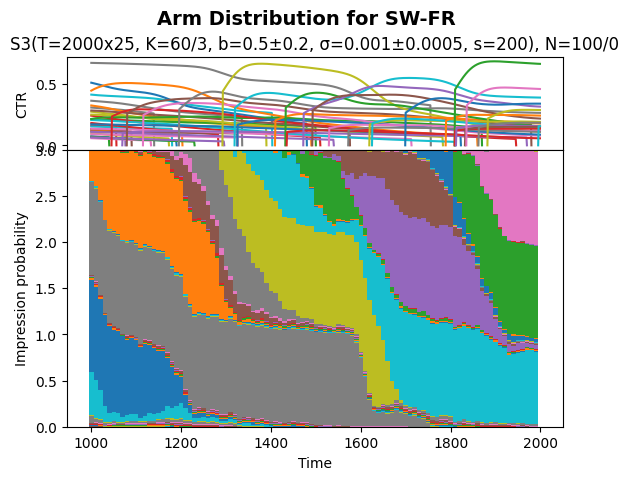

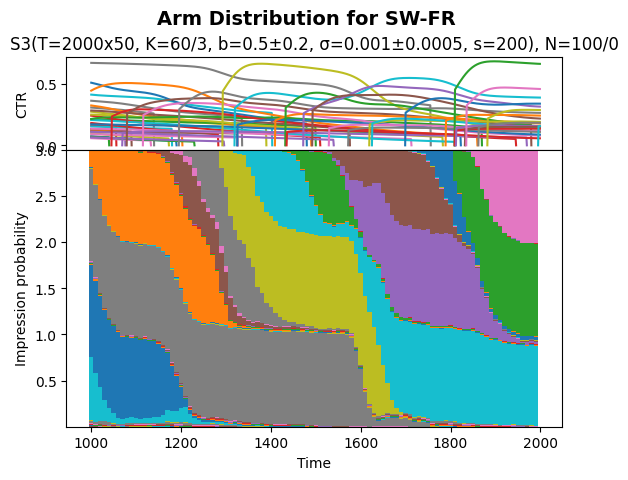

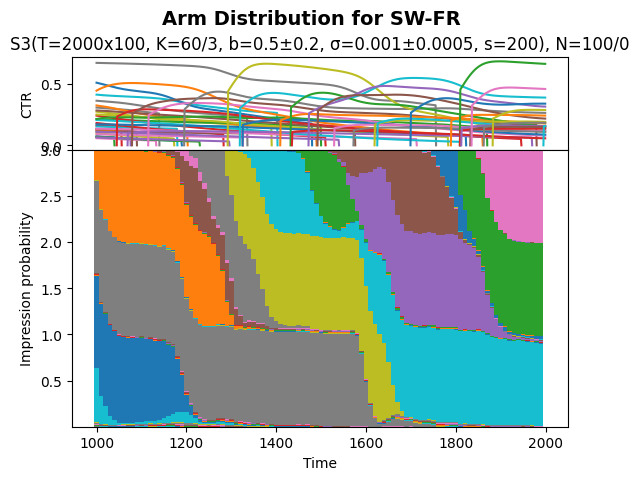

In [21]:
sim_elws_single.results.create_impressions_plot(agent='SW-FR', tmin=1000)

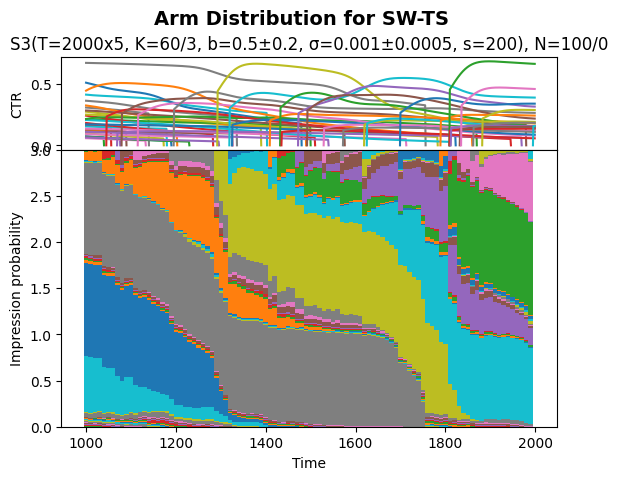

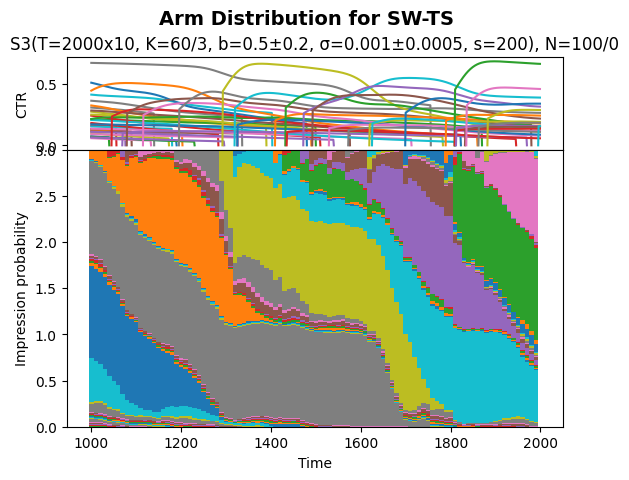

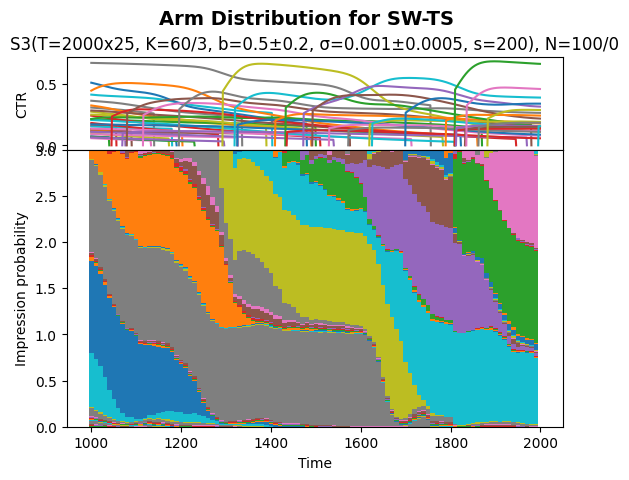

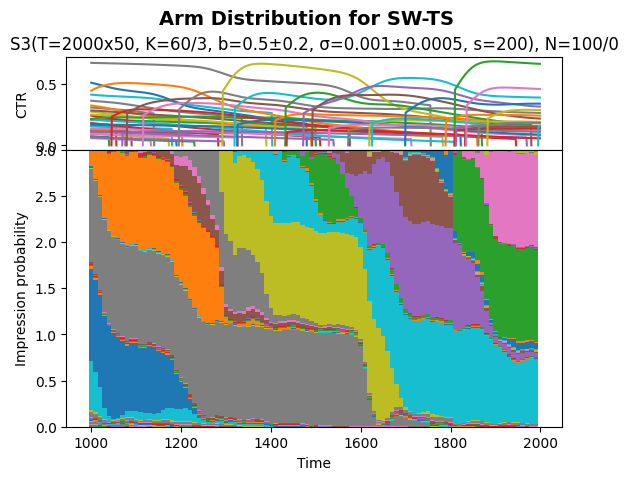

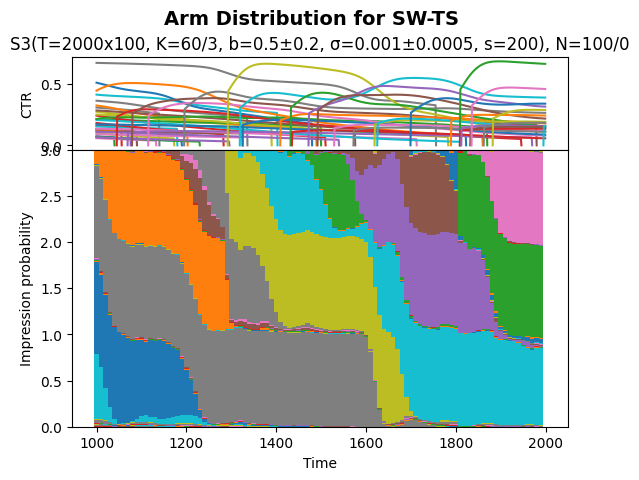

In [22]:
sim_elws_single.results.create_impressions_plot(agent='SW-TS', tmin=1000)

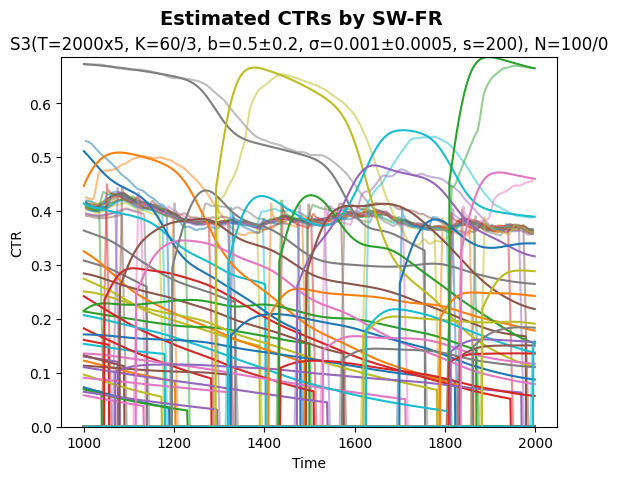

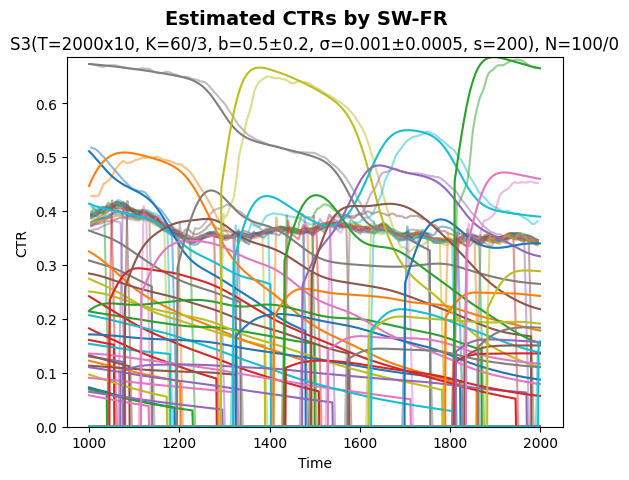

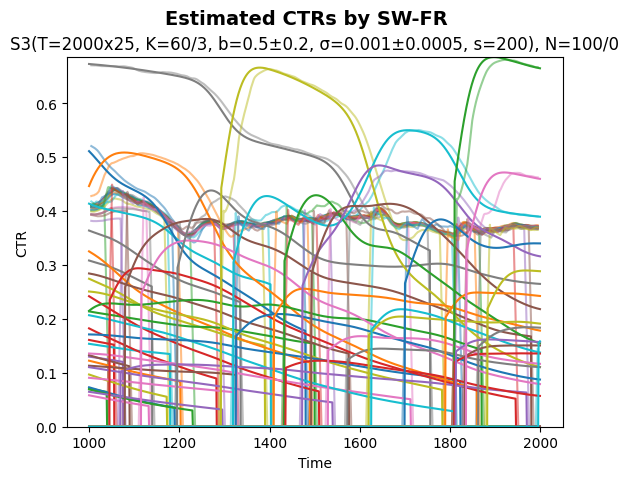

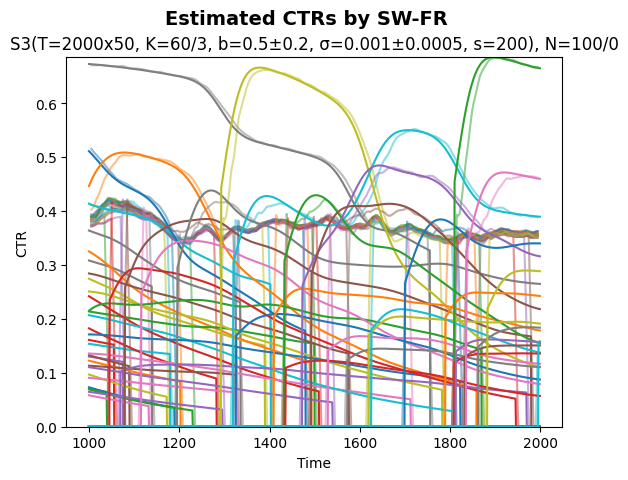

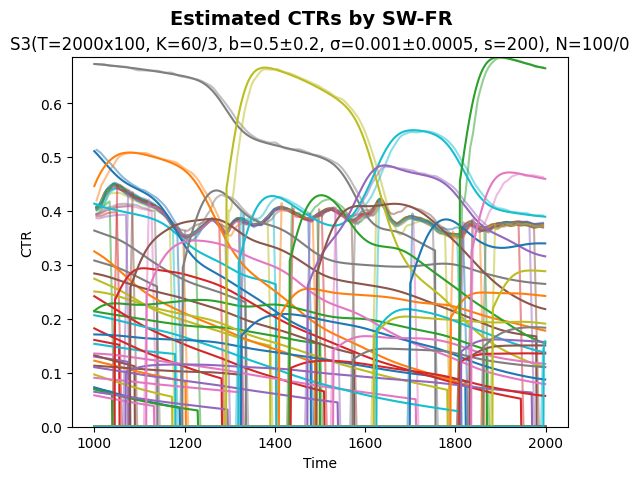

In [23]:
sim_elws_single.results.create_estimates_plot(agent='SW-FR', tmin=1000)

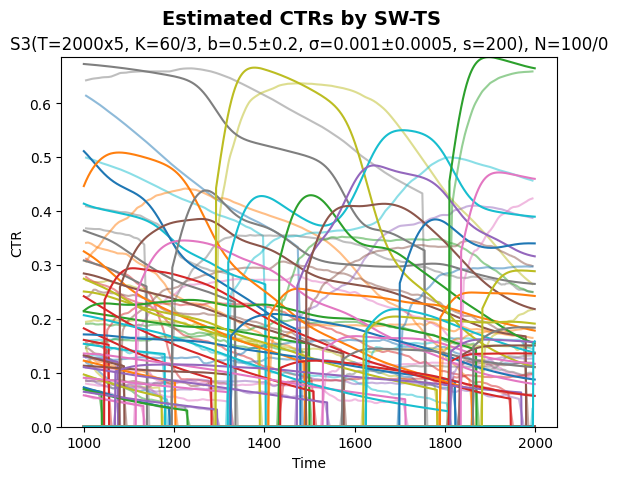

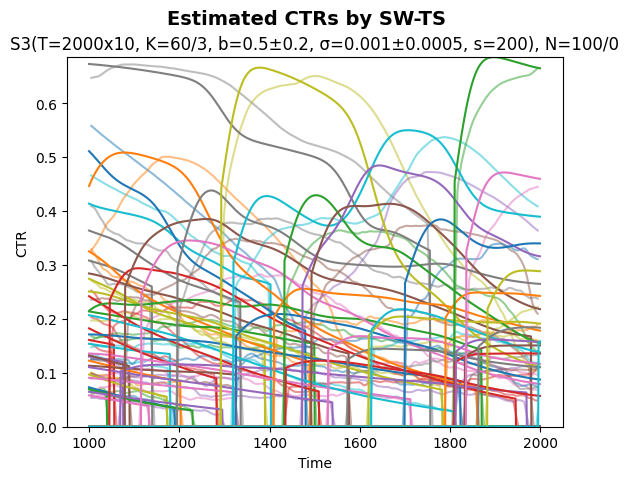

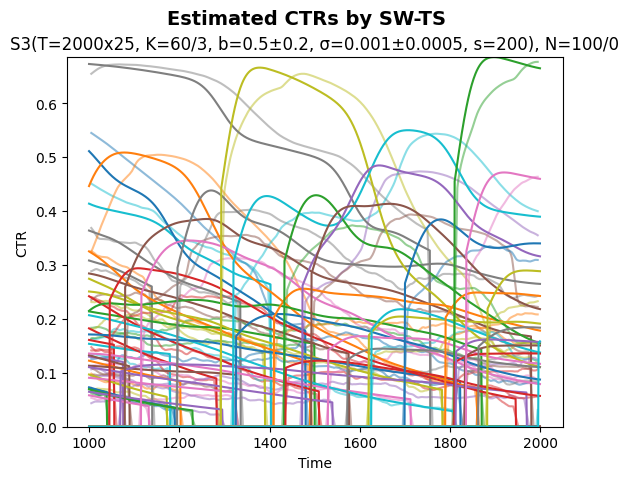

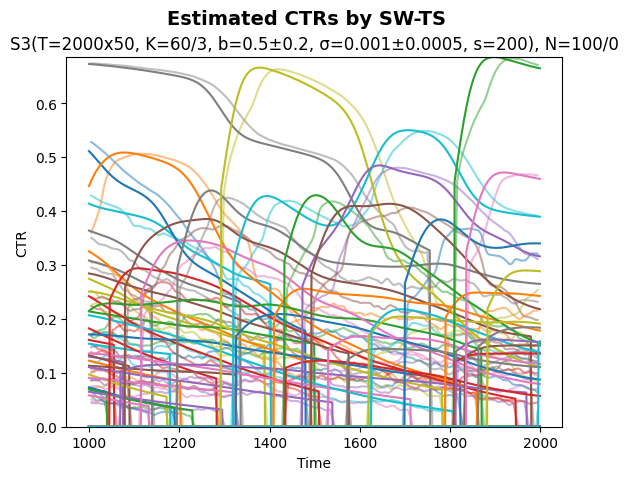

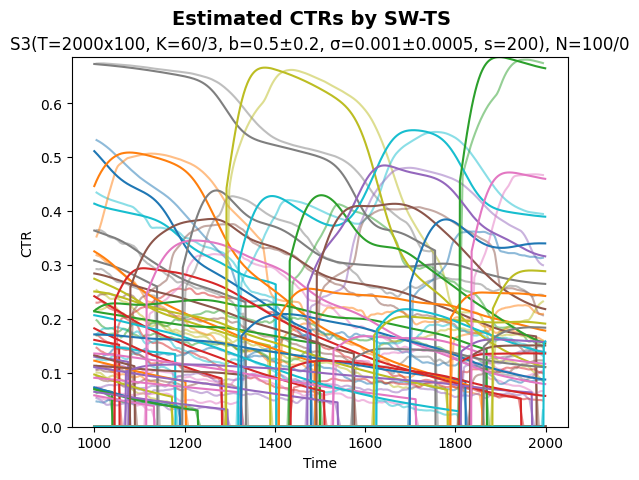

In [24]:
sim_elws_single.results.create_estimates_plot(agent='SW-TS', tmin=1000)

## Problem with sliding window

In [32]:
sim = Simulator(run_count=50, seed_change_interval=0)
setting_elws.episode_length = 50
sim.set_setting(setting_elws)
sim.run_oracle()
ws_fr, d = params_FR[el]
ws_ts = params_TS[el]
sim.run_agent(ThompsonAgent, {'ws': 500})
sim.run_agent(FroomleAgent, {'ws': 500, 'boost_denominator': 1, 'boost_rank': 2})
    
sim_sw_problem = sim

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

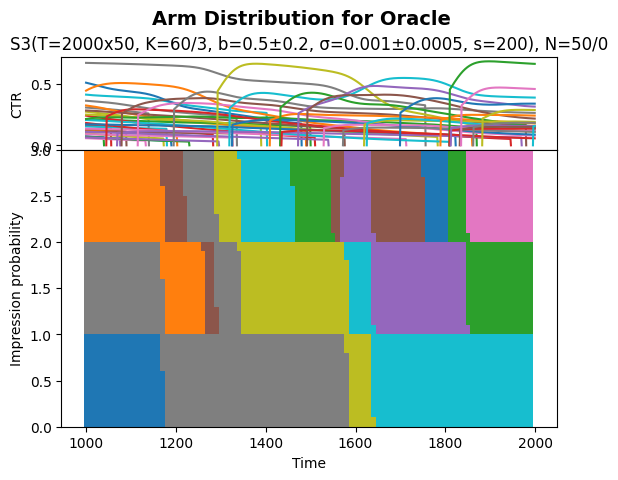

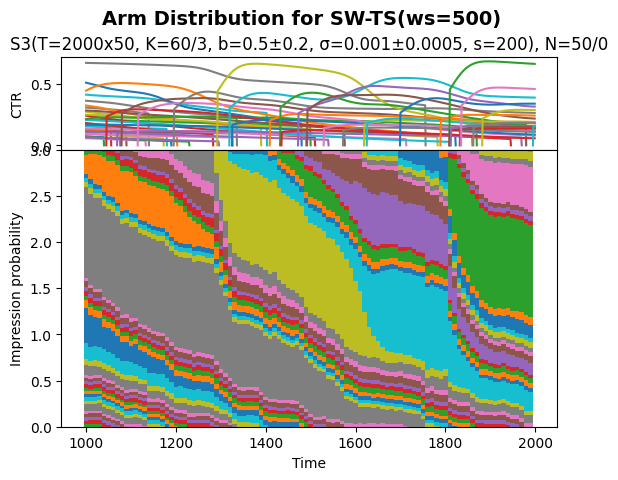

In [33]:
sim_sw_problem.results.create_impressions_plot(tmin=1000)